## Feature Extraction

1) Time and frequency domain

2) Mean, median, standard deviation, peak values

3) Absolute integral

4) Power ratio of the frequency bands 0-2.75Hz and 0-5Hz

5) Peak frequency of the power spectral density (PSD)

6) Spectral entropy of the normalized PSD

7) Take synchronized data from the three IMUs: Mean, standard deviation, absolute integral and energy are calculated on 3 axes of each of the IMUs pairwise

8) Heart rate: features (normalized) mean and gradient. (Note: Normalization is done on the interval defined by resting and maximum HR)

9) And more...

In [2]:
import dataprocess as dp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Prepare samples

In [8]:
# Load all protocol subjects
colName=dp.exportColName()
data=dp.loadAllSubjects()

In [9]:
# Remove actID=0 and acc6g and orientation data
effectiveData=dp.removeAct0(data)
effectiveData=dp.removeAcc6gOri(effectiveData)

In [10]:
# Fill NaN by linear interpolation
noNaNData=dp.interpolateNaN(effectiveData, method='linear')

In [11]:
# Remove heads and tails of all activities from all subjects:
actDict=dp.throwAllHeadsAndTails(noNaNData, dt=10)

In [13]:
# Cut all spectra into 1-sec-long segments:
dataDict=dp.chopAllSpectra(actDict, duration=5.12, withT=True)

Checking discontinuity Count...
actID=1,	 count=0/1724
actID=2,	 count=0/1652
actID=3,	 count=0/1700
actID=17,	 count=0/2186
actID=16,	 count=0/1553
actID=12,	 count=0/773
actID=13,	 count=0/624
actID=4,	 count=0/2187
actID=7,	 count=0/1704
actID=6,	 count=0/1471
actID=5,	 count=0/831
actID=24,	 count=0/364


In [14]:
print('Total segment counts =', sum([dataDict[a].shape[0] for a in list(actDict.keys())]))

Total segment counts = 16769


**Note: Now we have 16769 spectrum segments from 9 protocol subjects: **

1) Each have 33 columns (31 features + actID + timestamp) and 512 rows (5.12 sec long).

2) Each segment is from the a single subject (don't have two spectra from two subjects merged into one).

3) Each segment belongs to one activity (a spectrum segment won't be at transition between two activities).

**We can view a segment as the following:**

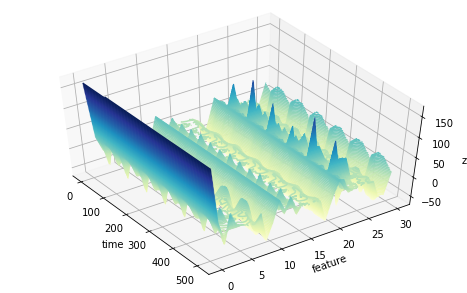

In [15]:
# Show a segment (the no.101 data of actID=5) (without showing timestamp and actID in the contour)
dp.showContour(dataDict[5][100][:, 2:])

## Feature Extraction: Time domain

Help with tsfresh package.

In [16]:
import tsfresh.feature_extraction.feature_calculators as ft_cal

C:\Users\Elite840G2\Anaconda3\envs\ds100\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [17]:
# 1. Create a dictionary to store the feature data for actID=5
# 2. Transform segment data format into tsfresh-compatible format:
act5DFlist=[]
for i in range(len(dataDict[5])):
    act5DFlist.append(dp.toTsfreshFormat(dataDict[5][i]))

act17DFlist=[]
for i in range(len(dataDict[5])):
    act17DFlist.append(dp.toTsfreshFormat(dataDict[17][i]))

In [18]:
act17DFlist[25].head()

,activityID,timestamp,heart_rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,...,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z
0,17.0,893.05,100.0,33.25,-2.89722,2.83408,7.41520,0.135691,1.16435,0.780773,...,33.8125,9.77243,-1.048260,-0.179584,-0.123134,0.111788,-0.060290,-61.6433,-16.2675,38.2781
1,17.0,893.06,100.0,33.25,-2.92323,2.23137,7.87869,0.202494,1.17050,0.689092,...,33.8125,9.81975,-1.051390,0.168227,-0.087035,0.117513,-0.015241,-61.2066,-15.7248,37.7852
2,17.0,893.07,100.0,33.25,-2.81066,2.11668,7.88076,0.193440,1.13596,0.595943,...,33.8125,9.81245,-0.973201,-0.102460,-0.139783,0.069501,-0.044188,-60.9853,-15.9435,37.0384
3,17.0,893.08,100.0,33.25,-2.71690,2.42364,8.34298,0.239003,1.10288,0.550348,...,33.8125,9.66356,-1.238670,-0.025161,-0.083829,0.139882,-0.038654,-62.0948,-16.2468,37.9107
4,17.0,893.09,100.0,33.25,-2.46290,3.26191,8.95975,0.290973,1.01048,0.442759,...,33.8125,9.69698,-1.161690,-0.179654,-0.023806,0.045921,-0.037802,-61.9775,-16.6905,37.7812


### 1) Mean and median

In [19]:
hand_acc16g_x_mean5 = np.array([ft_cal.mean(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_median5 = np.array([ft_cal.median(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_absEnergy5 = np.array([ft_cal.abs_energy(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_max5 = np.array([ft_cal.maximum(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_min5 = np.array([ft_cal.minimum(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_std5 = np.array([ft_cal.standard_deviation(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

hand_acc16g_x_mean17 = np.array([ft_cal.mean(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_median17 = np.array([ft_cal.median(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_absEnergy17 = np.array([ft_cal.abs_energy(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_max17 = np.array([ft_cal.maximum(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_min17 = np.array([ft_cal.minimum(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_std17 = np.array([ft_cal.standard_deviation(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

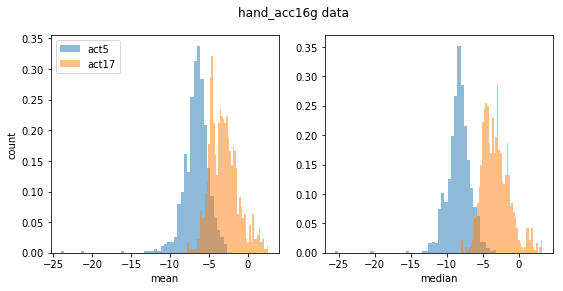

In [20]:
plt.figure(figsize=[9, 4])
plt.suptitle('hand_acc16g data')
plt.subplot(121)
plt.hist(hand_acc16g_x_mean5, bins=50, label='act5', alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_mean17, bins=50, label='act17', alpha=0.5, normed=True)
plt.xlabel('mean')
plt.ylabel('count')
plt.legend()
plt.subplot(122)
plt.hist(hand_acc16g_x_median5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_median17, bins=50, alpha=0.5, normed=True)
plt.xlabel('median');

**Note1: Here are the histogram of three different features (mean, median, abs_energy). I'm comparing the distribution of these features between different activities (actID=5(running) and 17(ironing)). If we can tell the activities apart by looking at these distribution, then that feature could be a good feature to involve in developing a classifier. **

**Note2: Mean and median are both good features (though I like the median better because it is in a nicer single mode, and the two bunches (maybe) seperate further than the mean). **

### 2) standard deviation, peak values

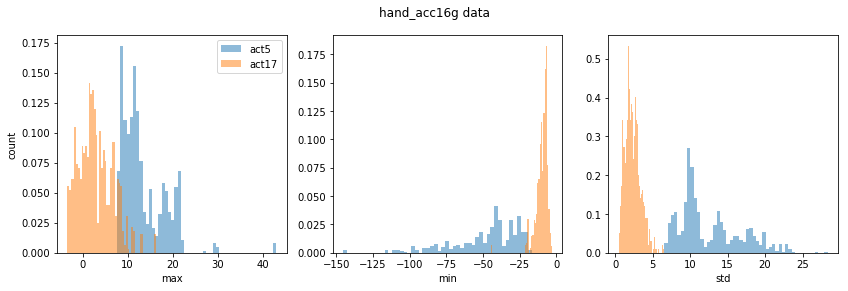

In [21]:
plt.figure(figsize=[14, 4])
plt.suptitle('hand_acc16g data')
plt.subplot(131)
plt.hist(hand_acc16g_x_max5, bins=50, label='act5', alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_max17, bins=50, label='act17', alpha=0.5, normed=True)
plt.xlabel('max')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_min5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_min17, bins=50, alpha=0.5, normed=True)
plt.xlabel('min')
plt.subplot(133)
plt.hist(hand_acc16g_x_std5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_std17, bins=50, alpha=0.5, normed=True)
plt.xlabel('std');

**Note: max and min distributions actually match the result of std distribution. The absolute values of min and max of act17 are both smaller than act5 might suggest act17 has smaller standard deviation. We may only include std or (min, max) into the model.**

### 3) Variance, absolute_energy, absolute_sum_of_changes

In [22]:
hand_acc16g_x_variance5 = np.array([ft_cal.variance(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_absSumOfChange5 = np.array([ft_cal.absolute_sum_of_changes(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

hand_acc16g_x_variance17 = np.array([ft_cal.variance(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_absSumOfChange17 = np.array([ft_cal.absolute_sum_of_changes(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])

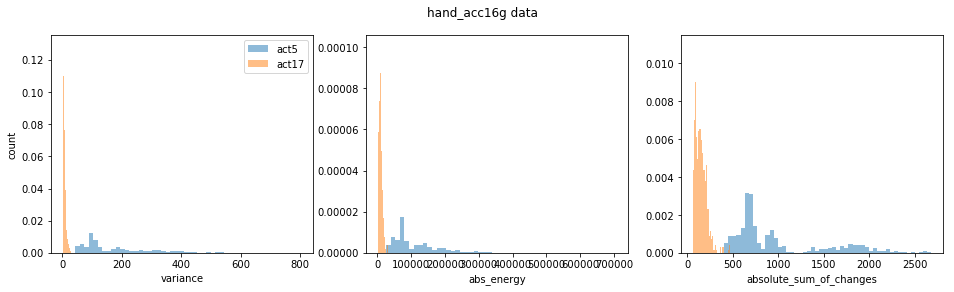

In [23]:
plt.figure(figsize=[16, 4])
plt.suptitle('hand_acc16g data')
plt.subplot(131)
plt.hist(hand_acc16g_x_variance5, bins=50, label='act5', alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_variance17, bins=50, label='act17', alpha=0.5, normed=True)
plt.xlabel('variance')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_absEnergy5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_absEnergy17, bins=50, alpha=0.5, normed=True)
plt.xlabel('abs_energy')
plt.subplot(133)
plt.hist(hand_acc16g_x_absSumOfChange5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_absSumOfChange17, bins=50, alpha=0.5, normed=True)
plt.xlabel('absolute_sum_of_changes');

**Note1: The distribution of variance matches that of std (and this is what we would expect), so we can just pick one of them.**

**Note2: abs_energy: $E=\sum_{i=1}^n {x_i}^2$; absolute_sum_of_change: $\sum_{i=1}^{n-1} \vert x_{i+1}-x_i\vert$**


### 4) count_above_mean, skewness, kurtosis

In [24]:
hand_acc16g_x_cntAbove5 = np.array([ft_cal.count_above_mean(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_skewness5 = np.array([ft_cal.skewness(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_kurtosis5 = np.array([ft_cal.kurtosis(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

hand_acc16g_x_skewness17 = np.array([ft_cal.skewness(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_kurtosis17 = np.array([ft_cal.kurtosis(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_cntAbove17 = np.array([ft_cal.count_above_mean(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])

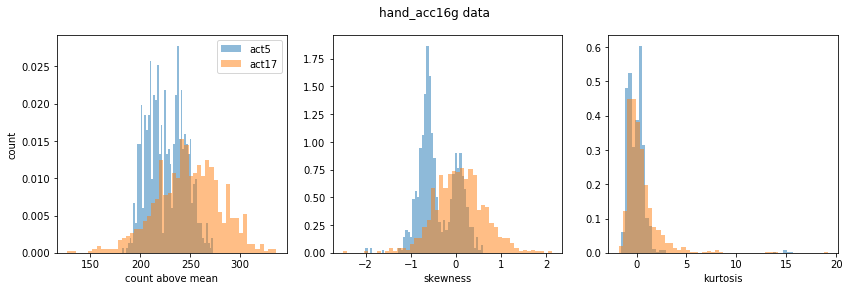

In [25]:
plt.figure(figsize=[14, 4])
plt.suptitle('hand_acc16g data')
plt.subplot(131)
plt.hist(hand_acc16g_x_cntAbove5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(hand_acc16g_x_cntAbove17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('count above mean')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_skewness5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_skewness17, bins=50, alpha=0.5, normed=True)
plt.xlabel('skewness')
plt.subplot(133)
plt.hist(hand_acc16g_x_kurtosis5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_kurtosis17, bins=50, alpha=0.5, normed=True)
plt.xlabel('kurtosis');

**Note1: count_above_mean: number of data point in a spectrum with value larger than its mean.**

**Note2: count_above_mean and kurtosis features have distributions overlap too much between different activities. From skewness histogram, it seems that act17 has a pretty good normal distribution center at zero, while act5 can some time skew to the right but more offen skew left. Would this be a useful feature??**